# Gradient of Image

## import library

In [2]:
import numpy as np
import matplotlib.image as img

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')


In [3]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [4]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [15]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = np.mean(I0, axis=-1)
    
num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [16]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = I / 255.

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  0.9986928104575163
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [26]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # x == row y == column
    # I  = [[A],[B],[],..[0]     ]
    # I_ = [[B],[],[],..[0] + [0]]
    I_ = np.vstack([I[1:], I[-1]])

    D = I_ - I 
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


- backward difference : $ I[x, y] - I[x-1, y] $ 

In [31]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # x == row y == column
    # I  = [[A],[B],[] ,..[0]]
    # I_ = [[A],[A],[B],..[Z]]
    I_ = np.vstack([I[0], I[:-1]])

    D = I - I_
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [35]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # x == row y == column
    # I   = [[A],[B],[] ,..[0]]
    # I_  = [[A],[A],[B],..[Z]]
    # I__ = [[B],[] ,..[0][0]]
    I_ = np.vstack([I[0], I[:-1]])
    I__ = np.vstack([I[1:], I[-1]])

    D = (I__ - I_)/2
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [37]:
def compute_derivative_y_forward(I):

    D = np.zeros(I.shape)
   
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_t = np.transpose(I)
    D_t = np.zeros(I_t.shape)
    I_ = np.vstack([I_t[1:], I_t[-1]])

    D_t = I_ - I_t 
    D = np.transpose(D_t)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

(510, 512)


- backward difference : $ I[x, y] - I[x, y-1] $ 

In [43]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_t = np.transpose(I)
    D_t = np.zeros(I_t.shape)

    I_ = np.vstack([I_t[0], I_t[:-1]])

    D_t = I_t - I_
    D = np.transpose(D_t)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [45]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_t = np.transpose(I)
    D_t = np.zeros(I_t.shape)
    
    I_ = np.vstack([I_t[0], I_t[:-1]])
    I__ = np.vstack([I_t[1:], I_t[-1]])

    D_t = (I__ - I_)/2

    D = np.transpose(D_t)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [47]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    norm_gradient = np.power(compute_derivative_x_central(I),2) + np.power(compute_derivative_y_central(I),2)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient


(510, 512)


___

___

## functions for presenting the results

___

___

In [48]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [49]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [50]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [51]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [52]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [53]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [54]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [55]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [56]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [57]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [58]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [59]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [60]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [61]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [62]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [63]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [64]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


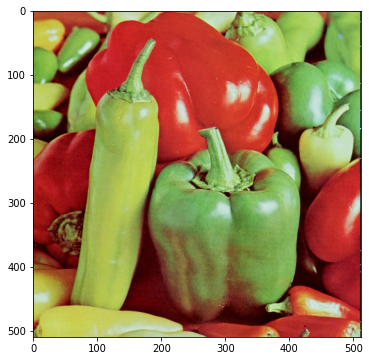

**************************************************
## [RESULT 02]
**************************************************


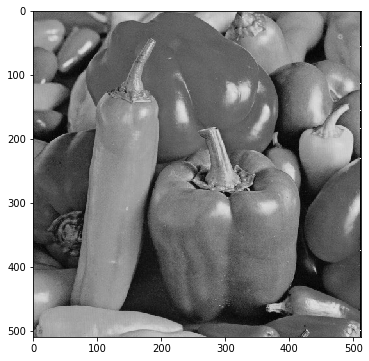

**************************************************
## [RESULT 03]
**************************************************


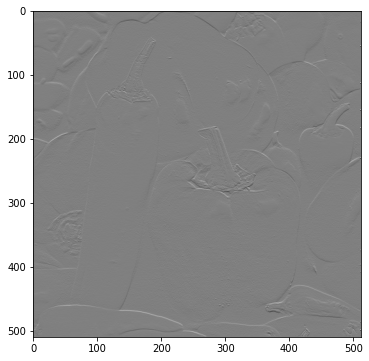

**************************************************
## [RESULT 04]
**************************************************


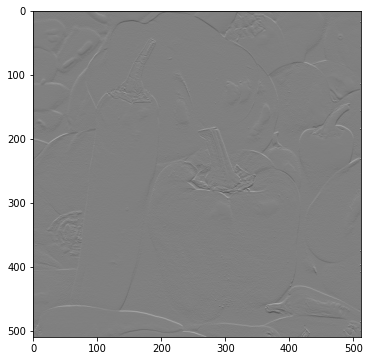

**************************************************
## [RESULT 05]
**************************************************


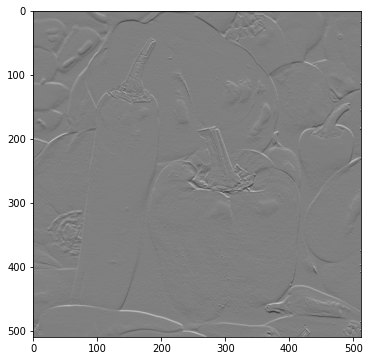

**************************************************
## [RESULT 06]
**************************************************


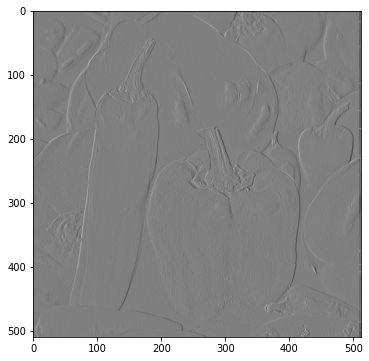

**************************************************
## [RESULT 07]
**************************************************


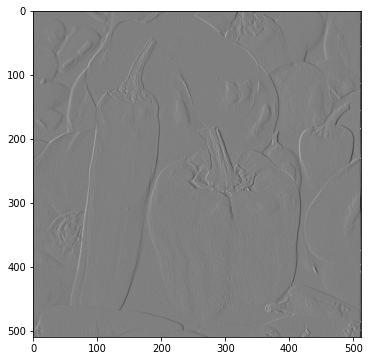

**************************************************
## [RESULT 08]
**************************************************


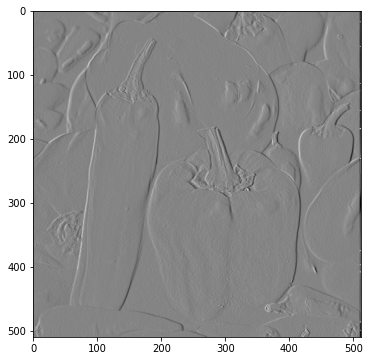

**************************************************
## [RESULT 09]
**************************************************


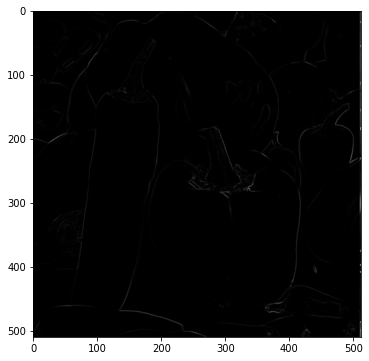

**************************************************
## [RESULT 10]
**************************************************


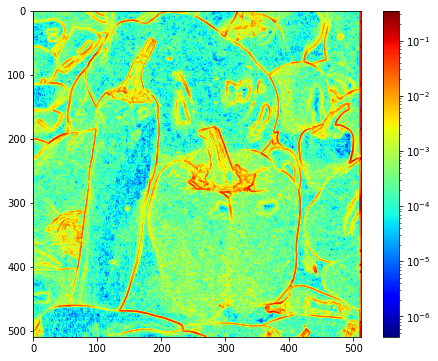

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.007843137254901988
value2 =  0.0
value3 =  -0.005228758169934622
value4 =  0.011764705882352955
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  0.0026143790849673205
value3 =  0.01568627450980392
value4 =  -0.01307189542483661
**************************************************
## [RESULT 13]
**************************************************
value1 =  -0.003921568627450994
value2 =  0.0013071895424836603
value3 =  0.00522875816993465
value4 =  -0.0006535947712418277
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.035294117647058865
value2 =  0.0
value3 =  -0.016993464052287577
value4 =  0.0
**************************************************
## [RESULT 15]
*******************************

In [65]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)